In [1]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier 

In [2]:
matrix_data = pan.read_csv("Telco-Customer-Churn.csv")

In [3]:
matrix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
matrix_data.select_dtypes(exclude = "number").describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [5]:
matrix_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [6]:
matrix_data.isna().sum()
matrix_data.isna().sum().sum()

0

<Axes: xlabel='Churn', ylabel='count'>

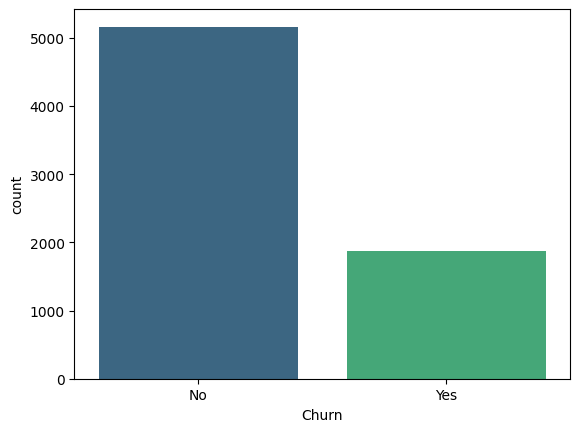

In [7]:
sns.countplot(x = matrix_data["Churn"], palette = "viridis")
#the dataset appears to be unbalanced

<Axes: xlabel='Churn', ylabel='TotalCharges'>

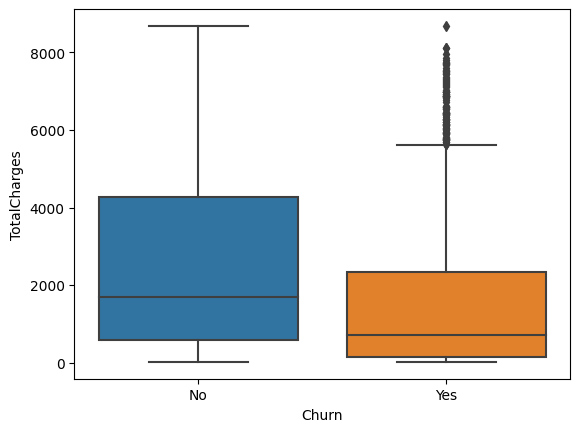

In [8]:
sns.boxplot(x = matrix_data["Churn"], y = matrix_data["TotalCharges"])

<Axes: xlabel='TotalCharges', ylabel='Density'>

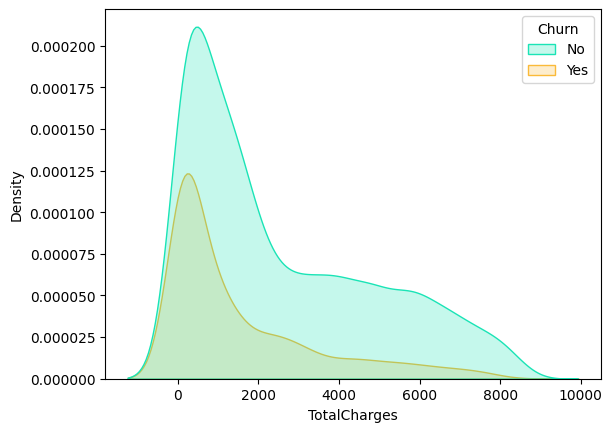

In [9]:
sns.kdeplot(x = matrix_data["TotalCharges"], hue = matrix_data["Churn"], fill = True, palette = "turbo")

<Axes: xlabel='Contract', ylabel='TotalCharges'>

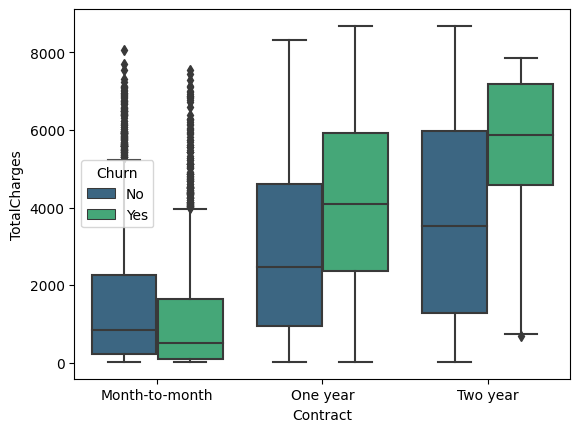

In [10]:
sns.boxplot(x = matrix_data["Contract"], y = matrix_data["TotalCharges"], hue = matrix_data["Churn"], palette = "viridis")

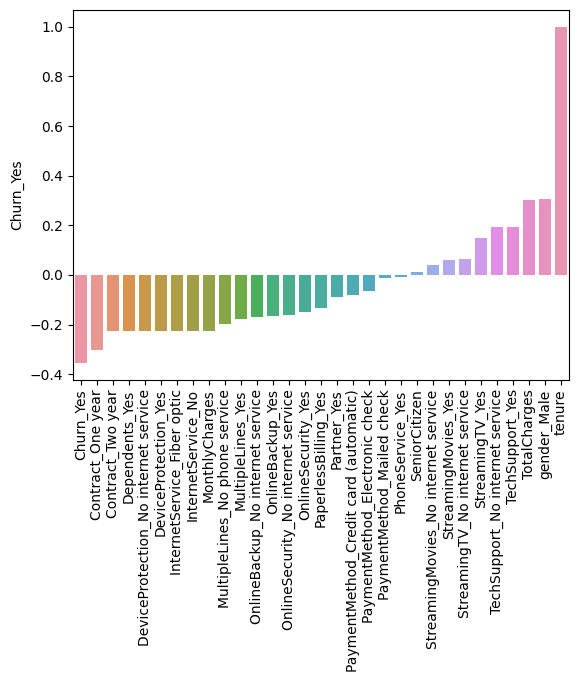

In [11]:
sns.barplot(y = pan.get_dummies(matrix_data.drop("customerID", axis = 1), drop_first = True).corr(numeric_only = True)["Churn_Yes"].sort_values(), x = pan.get_dummies(matrix_data.drop("customerID", axis = 1), drop_first = True).corr(numeric_only = True)["Churn_Yes"].index.sort_values())
plotter.xticks(rotation = 90);

In [12]:
pan.get_dummies(matrix_data.drop("customerID", axis = 1), drop_first = True).corr(numeric_only = True)["Churn_Yes"].sort_values()

tenure                                  -0.354049
Contract_Two year                       -0.301552
OnlineSecurity_No internet service      -0.227578
StreamingMovies_No internet service     -0.227578
StreamingTV_No internet service         -0.227578
TechSupport_No internet service         -0.227578
DeviceProtection_No internet service    -0.227578
OnlineBackup_No internet service        -0.227578
InternetService_No                      -0.227578
TotalCharges                            -0.199484
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691


In [13]:
matrix_data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

<Axes: xlabel='tenure', ylabel='Count'>

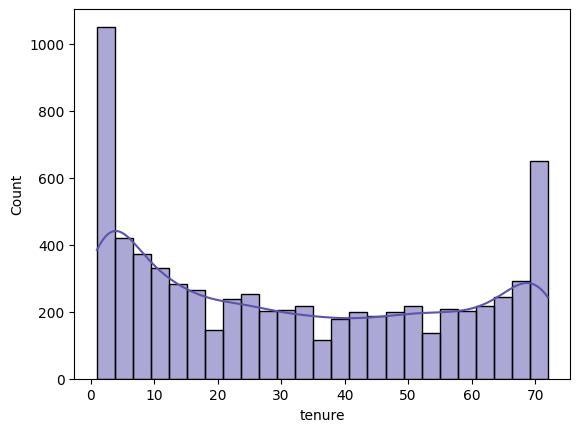

In [14]:
sns.histplot(matrix_data["tenure"], bins = 25, kde =True, color = "#5b53ac", fill = True)

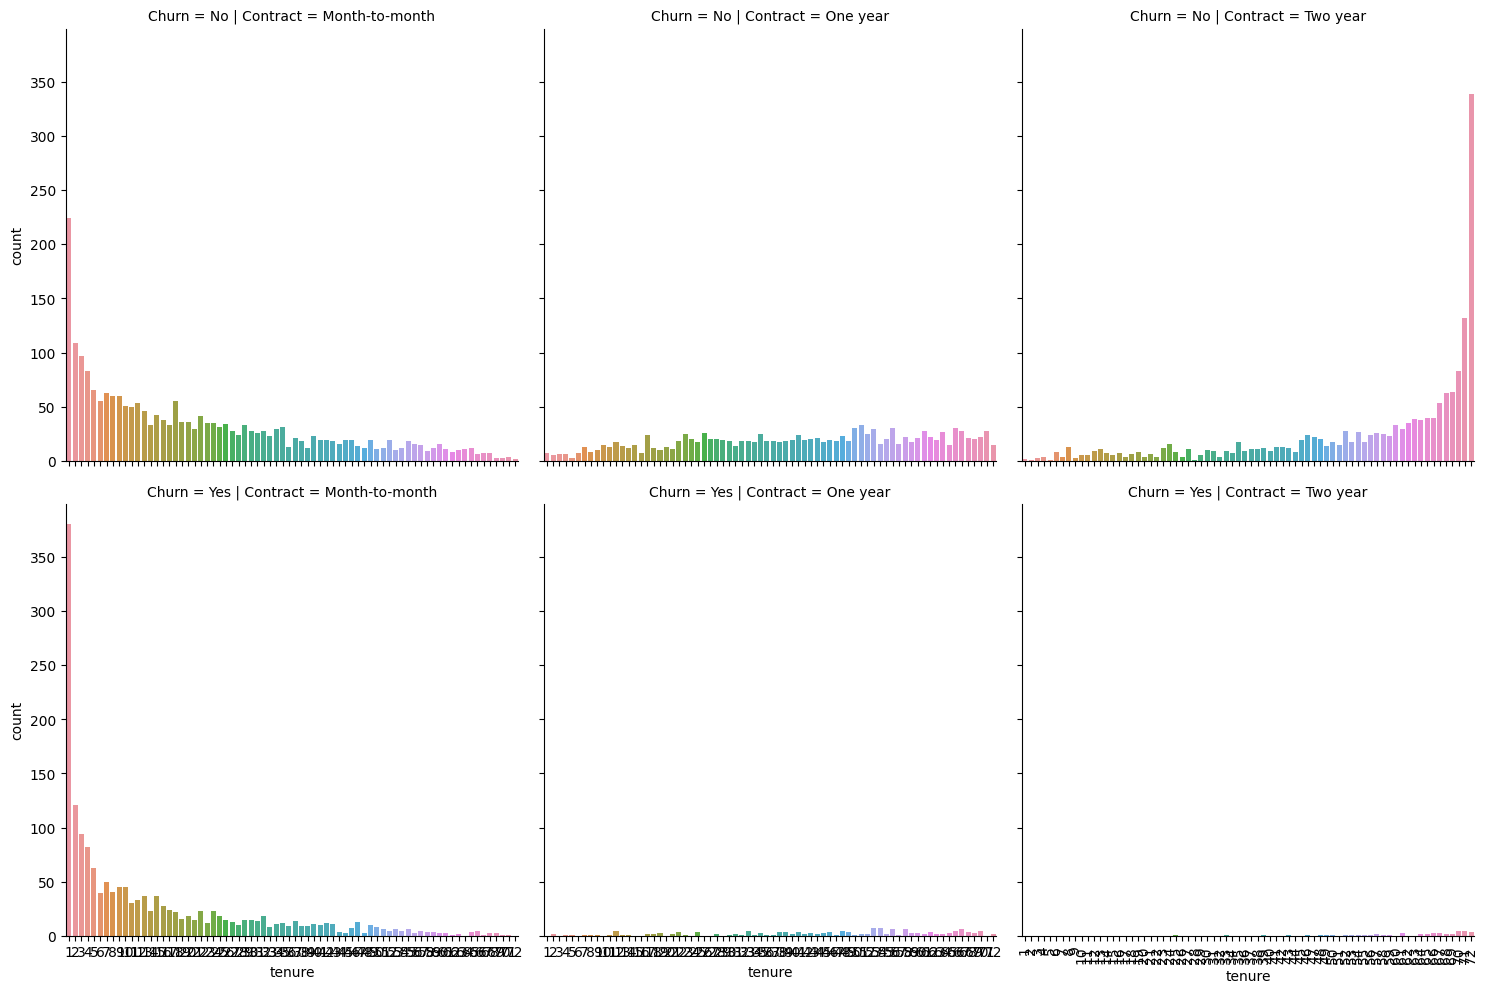

In [25]:
sns.catplot(data = matrix_data, row = "Churn", col = "Contract", x = "tenure", kind = "count")
plotter.xticks(rotation = 90);

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

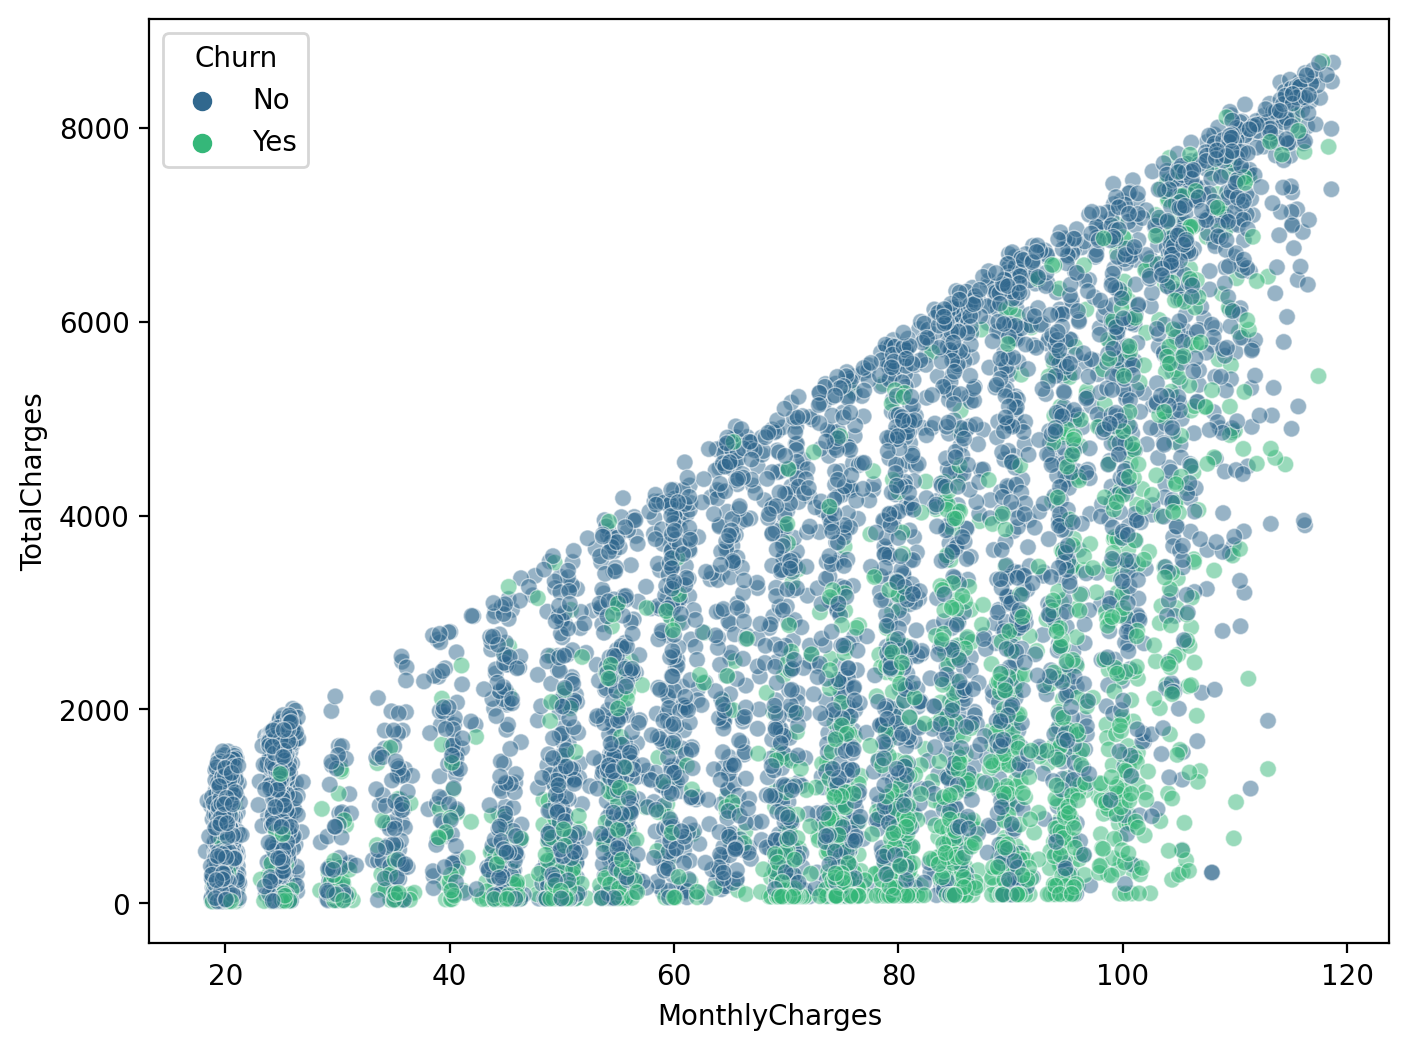

In [29]:
plotter.figure(figsize = (8, 6), dpi = 200)
sns.scatterplot(x = matrix_data["MonthlyCharges"], y = matrix_data["TotalCharges"], hue = matrix_data["Churn"], palette = "viridis", alpha = 0.5)

In [35]:
def segregate(x):
    if(x < 12):
        return "0 - 12 Months"
    elif (x < 24):
        return "12 - 24 Months"
    elif (x < 48):
        return "24 - 48 Months"
    else:
        return "Over 48 Months"
extra_matrix_data = matrix_data.copy(deep = True)
extra_matrix_data["Tenure_Cohort"] = np.vectorize(segregate)(matrix_data["tenure"])
#skip the rest of the cohort analysis

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

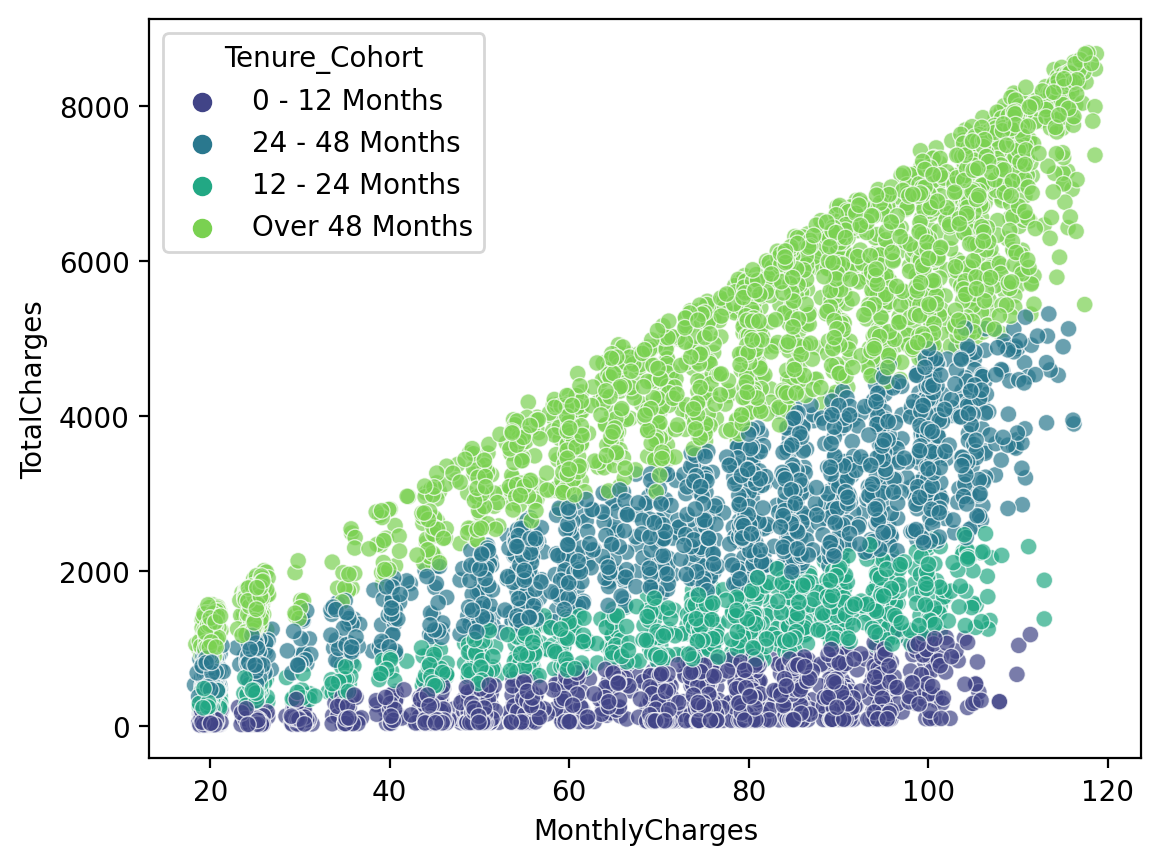

In [39]:
plotter.figure(dpi = 200)
sns.scatterplot(x = extra_matrix_data["MonthlyCharges"], y = extra_matrix_data["TotalCharges"], hue = extra_matrix_data["Tenure_Cohort"], palette = "viridis", alpha = 0.7)

<Axes: xlabel='Tenure_Cohort', ylabel='count'>

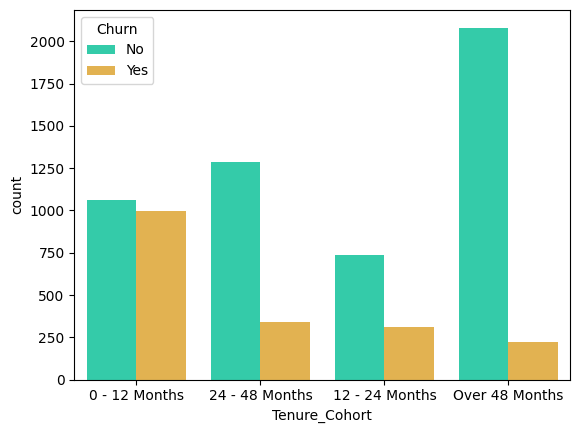

In [42]:
sns.countplot(x = extra_matrix_data["Tenure_Cohort"], hue = extra_matrix_data["Churn"], palette = "turbo")

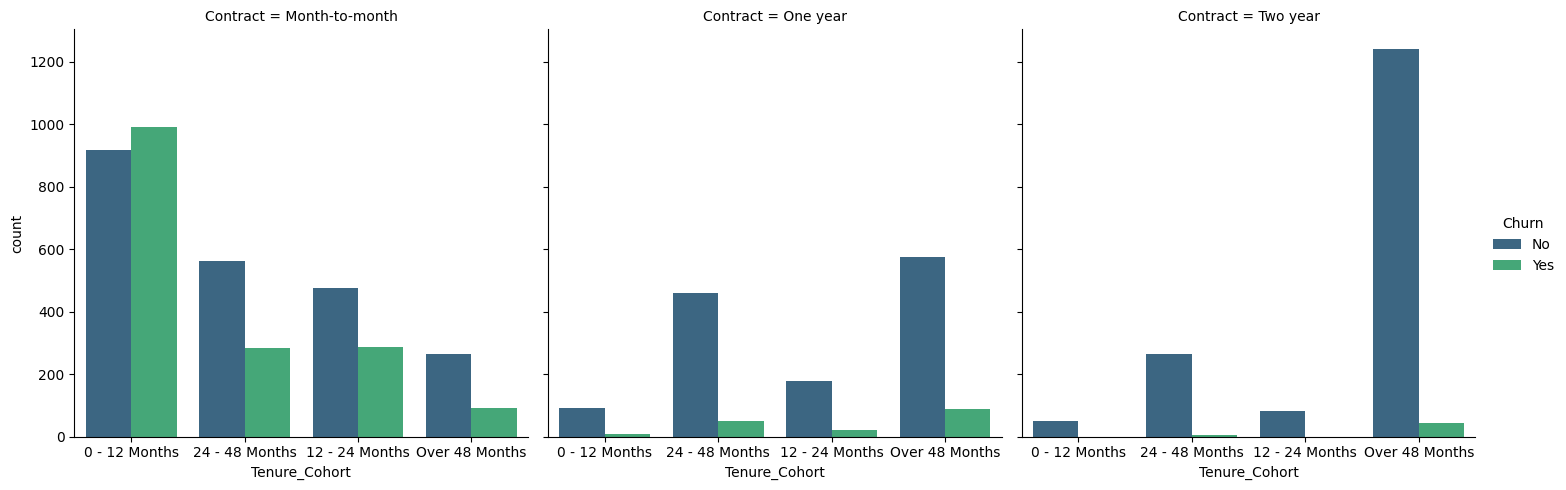

In [47]:
sns.catplot(data = extra_matrix_data, col = "Contract", x = "Tenure_Cohort", kind = "count", hue = "Churn", palette = "viridis")

In [53]:
#modelling
matrix_data.drop("customerID", axis = 1, inplace = True)
features = pan.get_dummies(matrix_data.drop("Churn", axis = 1), drop_first = True)
label = matrix_data["Churn"]

In [61]:
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.15, random_state = 42)
#scale for the svc
scaler = StandardScaler()
scaled_feature_train = scaler.fit_transform(feature_train)
scaled_feature_test = scaler.transform(feature_test)
#gridsearches
svc_sub_gridder = LinearSVC(max_iter = 1000000)
svc_param_grid = {"C": [0.005, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
ada_boost_sub_gridder = AdaBoostClassifier()
ada_boost_param_grid = {"n_estimators": [50, 100, 150, 200], "learning_rate": [0.1, 0.3, 0.5, 0.8, 1]}
svc_gridder = GridSearchCV(svc_sub_gridder, svc_param_grid, verbose = 1, n_jobs = 7, cv = 5)
ada_gridder = GridSearchCV(ada_boost_sub_gridder, ada_boost_param_grid, verbose = 1, n_jobs = 6, cv = 5)

In [62]:
svc_gridder.fit(feature_train, label_train)
ada_gridder.fit(feature_train, label_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "C:\Users\omoke\AppData\Roaming\Py

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=6,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 0.8, 1],
                         'n_estimators': [50, 100, 150, 200]},
             verbose=1)

In [64]:
svc_predictions = svc_gridder.predict(feature_test)
ada_predictions = ada_gridder.predict(feature_test)

              precision    recall  f1-score   support

          No       0.83      0.88      0.85       771
         Yes       0.61      0.52      0.56       284

    accuracy                           0.78      1055
   macro avg       0.72      0.70      0.71      1055
weighted avg       0.77      0.78      0.78      1055



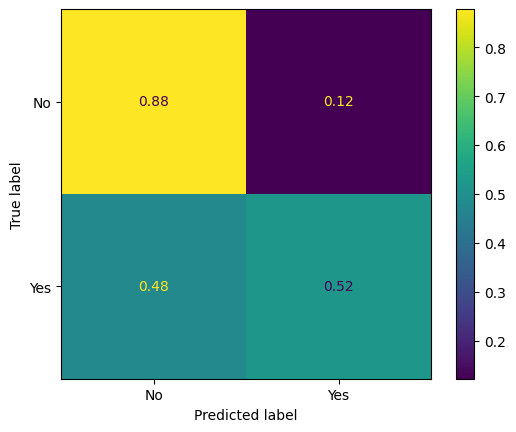

In [66]:
ConfusionMatrixDisplay.from_predictions(label_test, svc_predictions, normalize = "true")
print(classification_report(label_test, svc_predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.86       771
         Yes       0.65      0.48      0.55       284

    accuracy                           0.79      1055
   macro avg       0.74      0.69      0.71      1055
weighted avg       0.78      0.79      0.78      1055



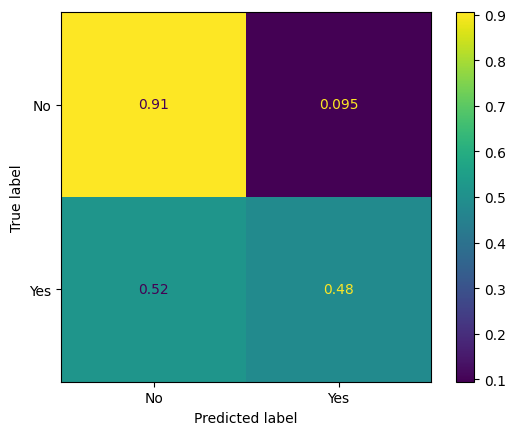

In [67]:
ConfusionMatrixDisplay.from_predictions(label_test, ada_predictions, normalize = "true")
print(classification_report(label_test, ada_predictions))